In [1]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
# https://albertcthomas.github.io/good-practices-random-number-generators/
# plt.rcParams["font.sans-serif"] = "Arial Unicode MS"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
# plt.rcParams["axes.unicode_minus"] = False
# mlib.rc('xtick', labelsize=15) 
# mlib.rc('ytick', labelsize=15) |
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
# Number of parallel threads to be used
# Shut down any existing Ray processes
# Initialize Ray with the specified number of parallel threads

num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-12-21 16:59:34,717	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8268 


Python version:,3.9.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8268


In [4]:
seed = 20221219
np.random.seed(seed)
n_replications = 1000

# problem size k=2**power
power = 13
base = 2

# Parameters of the problem configuration
gamma = 0.1
var = 1
lamda = -1
varlow = 1
varhigh = 2

n = 200
rng = np.random.default_rng(seed)

In [5]:
EFG_results = []
ratios = [0.  , 0.2 , 0.35, 0.45, 0.5 , 0.55, 0.6 , 0.64, 0.68, 0.72, 0.76,
       0.79, 0.82, 0.85, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]

for ratio in ratios:
    print("The allocated ratio is {}".format(ratio))
    # generate problem instances for k = 2**power per each replication
    SCCVgenerators =  [SCCVGenerator(base**power, gamma, var) for i in range(n_replications)]
    EMCVgenerators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]
    EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
    generator_types = [SCCVgenerators, EMCVgenerators,  EMIVgenerators, EMDVgenerators]
    for i, generators in enumerate(generator_types):
        print("----------------------------------Generator Type {}--------------------------------".format(i))
        n0 = np.int32(n*ratio)
        if n0 == 0:
            n0 = 1
        ng = n-n0
        print("EFG")
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
print(EFG_results)

The allocated ratio is 0.0
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 18 23:48:24 2022
PCS:0.131, PGS:0.131
Total time used: 695.3104066848755s, simulation ends at Sun Dec 18 23:59:58 2022
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Sun Dec 18 23:59:59 2022
PCS:0.158, PGS:0.158
Total time used: 700.9427735805511s, simulation ends at Mon Dec 19 00:11:38 2022
----------------------------------Generator Type 2--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 00:11:40 2022
PCS:0.15, PGS:0.15
Total time used: 703.1597630977631s, simulation ends at Mon Dec 19 00:23:22 2022
----------------------------------Generator Type 3--------------------------------
E

Start to simulate... at Mon Dec 19 03:07:06 2022
PCS:0.611, PGS:0.611
Total time used: 279.98254323005676s, simulation ends at Mon Dec 19 03:11:44 2022
The allocated ratio is 0.64
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 03:11:47 2022
PCS:0.533, PGS:0.533
Total time used: 251.22057962417603s, simulation ends at Mon Dec 19 03:15:56 2022
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 03:15:58 2022
PCS:0.77, PGS:0.77
Total time used: 249.67833280563354s, simulation ends at Mon Dec 19 03:20:06 2022
----------------------------------Generator Type 2--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 03:20:08 2022
PCS:0.796, PGS:0.796
Total time

Start to simulate... at Mon Dec 19 04:29:46 2022
PCS:0.833, PGS:0.833
Total time used: 107.27143502235413s, simulation ends at Mon Dec 19 04:31:32 2022
----------------------------------Generator Type 3--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 04:31:34 2022
PCS:0.671, PGS:0.671
Total time used: 108.14197707176208s, simulation ends at Mon Dec 19 04:33:20 2022
The allocated ratio is 0.88
----------------------------------Generator Type 0--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 04:33:23 2022
PCS:0.364, PGS:0.364
Total time used: 87.56399440765381s, simulation ends at Mon Dec 19 04:34:49 2022
----------------------------------Generator Type 1--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 04:34:51 2022
PCS:0.832, PGS:0.832
Total tim

Start to simulate... at Mon Dec 19 04:54:41 2022
PCS:0.131, PGS:0.131
Total time used: 4.1243507862091064s, simulation ends at Mon Dec 19 04:54:43 2022
----------------------------------Generator Type 2--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 04:54:45 2022
PCS:0.114, PGS:0.114
Total time used: 4.160707473754883s, simulation ends at Mon Dec 19 04:54:48 2022
----------------------------------Generator Type 3--------------------------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Dec 19 04:54:50 2022
PCS:0.045, PGS:0.045
Total time used: 4.1347432136535645s, simulation ends at Mon Dec 19 04:54:52 2022
[0.131, 0.158, 0.15, 0.101, 0.442, 0.498, 0.521, 0.394, 0.51, 0.632, 0.629, 0.466, 0.56, 0.685, 0.716, 0.567, 0.546, 0.744, 0.704, 0.571, 0.547, 0.756, 0.762, 0.59, 0.547, 0.762, 0.775, 0.611, 0.533, 0.77, 0.796, 0.638, 0.512, 0.783, 0.786, 0.614, 0.504

In [8]:
# results drawn from the above experiments for producing the Figure 5 and EC2
# EFG_results = [0.131, 0.158, 0.15, 0.101, 0.442, 0.498, 0.521, 0.394, 0.51, 
#            0.632, 0.629, 0.466, 0.56, 0.685, 0.716, 0.567, 0.546, 0.744, 
#            0.704, 0.571, 0.547, 0.756, 0.762, 0.59, 0.547, 0.762, 0.775, 
#            0.611, 0.533, 0.77, 0.796, 0.638, 0.512, 0.783, 0.786, 0.614, 
#            0.504, 0.792, 0.797, 0.658, 0.488, 0.816, 0.829, 0.629, 0.465, 
#            0.814, 0.82, 0.632, 0.436, 0.82, 0.831, 0.649, 0.408, 0.851, 0.833, 
#            0.671, 0.364, 0.832, 0.841, 0.672, 0.334, 0.838, 0.837, 0.65, 0.273, 
#            0.837, 0.83, 0.651, 0.188, 0.838, 0.831, 0.62, 0.087, 0.785, 0.797, 0.621, 
#            0.021, 0.756, 0.752, 0.483, 0.013, 0.131, 0.114, 0.045]

In [9]:
results = np.array(EFG_results).reshape(-1, 4).T

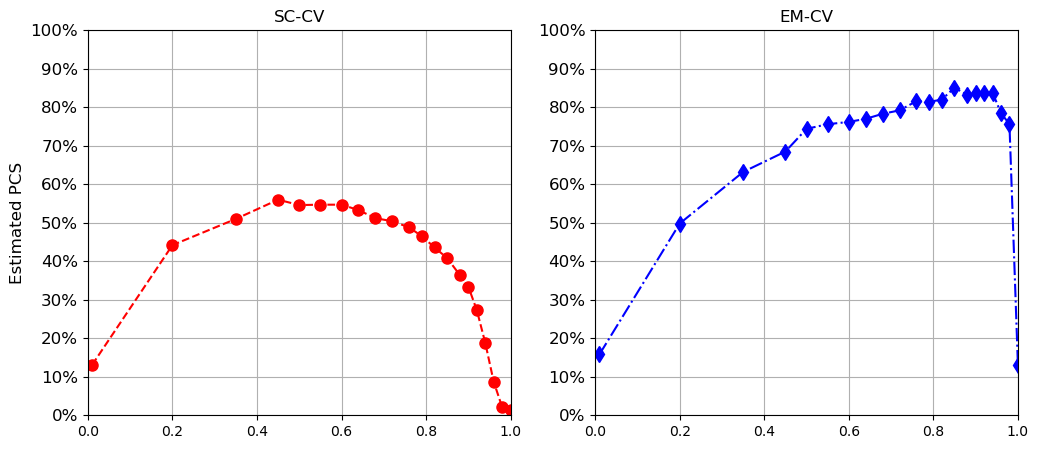

In [10]:
ratios[0] = 1/n

fontsize=12
colors = ["r" , "b",  "m","c", "k"]
markers = ["o", "d", "p", "D", "s"]
line_styles = ["--", "-.", ":","--", "-."]
fig = plt.figure(figsize=(12, 5))

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]

fig_plots = [(1,2,1), (1,2, 2)]

for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    result =results[i]
    plt.plot(ratios, result, line_styles[i], markersize=8, color=colors[i], marker=markers[i])

    plt.xlim(0, ratios[-1])
    xticks = ratios
    xticklabels = ratios
    
    plt.ylim(0., 1)
    yticks = np.arange(0., 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)

#     ax.legend(fontsize=30, prop={'family': 'serif',"size":fontsize})
    if i == 2 or i == 3:
        ax.set_xlabel("$n_0/c$", size=fontsize+2)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.4)

plt.show()

fig.savefig("Figure_5.pdf", bbox_inches='tight')

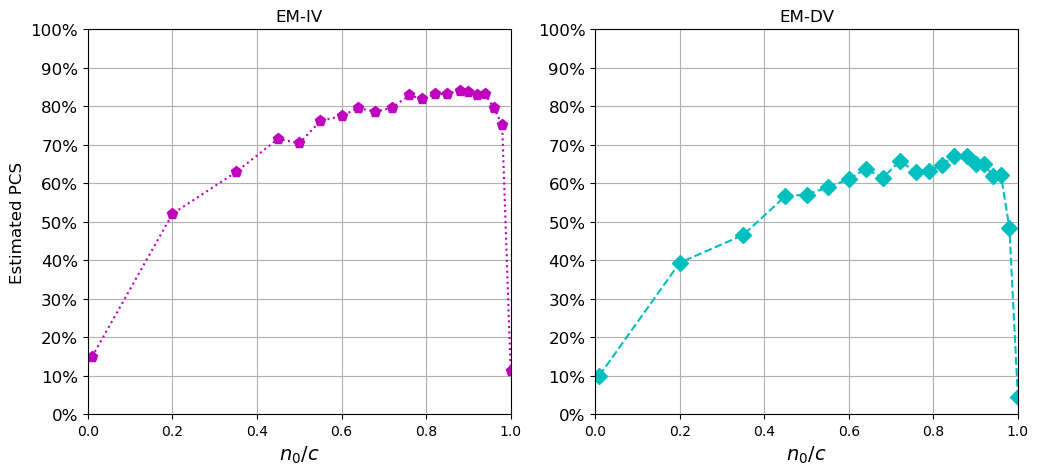

In [11]:
fontsize=12
colors = ["r" , "b",  "m","c", "k"]
markers = ["o", "d", "p", "D", "s"]
line_styles = ["--", "-.", ":","--", "-."]
fig = plt.figure(figsize=(12, 5))

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]

fig_plots = [(1,2,1), (1,2, 2)]

for _i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[_i])
    i = _i + 2
    result =results[i]
    plt.plot(ratios, result, line_styles[i], markersize=8, color=colors[i], marker=markers[i])

    plt.xlim(0, ratios[-1])
    xticks = ratios
    xticklabels = ratios
    
    plt.ylim(0., 1)
    yticks = np.arange(0., 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)

#     ax.legend(fontsize=30, prop={'family': 'serif',"size":fontsize})
    if i == 2 or i == 3:
        ax.set_xlabel("$n_0/c$", size=fontsize+2)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.4)

plt.show()

fig.savefig("Figure_EC2.pdf", bbox_inches='tight')